### The first step is to Load packages that will be used for the Analysis

In [1]:
import requests
import numpy as np
import os
import pandas as pd
import json
from timeit import default_timer as timer

import matplotlib.pyplot as plt                                     
plt.rc("font", size=14)
%matplotlib inline
from matplotlib import cm as cm

import seaborn as sns                                               
sns.set(style="darkgrid", color_codes=True)


### Gathering Data

#### 1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

- *archive_df* - this is a dataset "twitter-archive-enhanced.csv" which was converted into a dataframe and gives information on basic tweet data.  

In [2]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv', encoding='utf-8')
archive_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [3]:
archive_df.shape

(2356, 17)

In [4]:
#checking for duplicates
archive_df.tweet_id.duplicated().sum()

0

####  2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

- *tweets_info_df* - This dataset will contain information like tweet_id, no of retweets and no of favorites etc.,

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

folder_name = 'image-predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
    

In [6]:
image_predictions_df = pd.read_csv(folder_name + '/image-predictions.tsv', sep='\t')
image_predictions_df.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [7]:
#checking for duplicates
image_predictions_df.tweet_id.duplicated().sum()

0

#### 3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

- *image_predictions_df* - This dataset will contain information about predictions about the image.

I had issues opening a Twitter Developers account, so I downloaded the data manually from the link provided on the Udacity website, and saved the file as "tweet_json.txt". I will be loading the data manually from my local machine

In [8]:
#Reading the text file in json format
with open('tweet_json.txt') as file:
    data = json.load(file)
    

tweets_info_list = []
for tweet_id in data.keys():
    retweets = data[tweet_id]['retweet_count']
    favourites = data[tweet_id]['favorite_count']
    followers = data[tweet_id]['user']['followers_count']
    friends = data[tweet_id]['user']['friends_count']
    tweets_info_list.append({'tweet_id': tweet_id, 'retweets' : retweets,
                             'favorites': favourites
                             ,
                            'followers' : followers
                             , 
                             'friends' : friends
                            })
    
tweets_info_df = pd.DataFrame(tweets_info_list, columns = ['tweet_id', 'retweets', 'favorites','followers','friends'])
tweets_info_df.sample(10)

,tweet_id,retweets,favorites,followers,friends
2161,669214165781868544,175,447,7535176,12
747,778408200802557953,4753,14590,7535160,12
183,855860136149123072,1063,5120,7535158,12
2256,667502640335572993,222,537,7535176,12
1955,673317986296586240,269,886,7535172,12
791,772152991789019136,1221,4026,7535160,12
1470,693231807727280129,785,3012,7535145,12
1672,681610798867845120,508,2008,7535146,12
1029,743835915802583040,2235,0,7535140,12
818,768609597686943744,1317,4373,7535160,12


In [9]:
#checking for duplicates
tweets_info_df.tweet_id.duplicated().sum()

0

### Assesing the data



In the cells below, each column of each table in this twitter dataset is described. 
To see the table that goes hand in hand with these descriptions, I displayed each table in its entirety by displaying the pandas DataFrame that it was gathered into. 
This task is the mechanical part of visual assessment in pandas.

#### Assessing archive_df dataset

In [10]:
#### Display the archive_df table
archive_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
archive_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

`Enhanced Twitter Archive`

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which  used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, we have filtered for tweets with ratings only (there are 2356).

`archive_df` columns and their description:
    
- **tweet_id**: the unique identifier for each of the tweet
- **in_reply_to_status_id**: the status id for the reply given to the tweet id
- **in_reply_to_user_id**: the status id for the reply given to the tweet id ( w.r.t user id)
- **timestamp**: Date and time the tweet was created, in Excel-friendly format.
- **source**: the web link as source
- **text**: the corresponding tweets text
- **retweeted_status_id**: the status id for the reply given to the tweet id i.e., for the retweeted id
- **retweeted_status_user_id**: the status id for the reply given to the tweet id ( w.r.t user id) i.e., for the retweeted id
- **retweeted_status_timestamp**: Date and time the tweet was created, in Excel-friendly format.
- **expanded_urls**: Expanded version of url1; URL entered by user and displayed in Twitter. Note that the user-entered URL may itself be a shortened URL, e.g. from bit.ly.
- **rating_numerator**: the ranking given by the user
- **rating_denominator**: The reference ranking given by the user 
- **name**: the breed or dog's name
- **doggo**, **floofer**,  **pupper**, **puppo** -- The stage of the dog

the link to the twitter data columns description can be found [here ](https://sfm.readthedocs.io/en/1.4.3/data_dictionary.html)

In [12]:
#Checking the descriptive statistics 
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
#Checking the datatypes
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
#checking the null values present in each columns
archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [15]:
#Checking for duplicates
archive_df[archive_df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


from the results seen above, it is indictaed that there are no duplicated values

In [16]:
archive_df[archive_df['name'] == 'officially']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1747,679111216690831360,NaN,NaN,2015-12-22 01:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is officially the greatest yawn of all ti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679111216...,12,10,officially,None,None,None,None


In [17]:
#Checking the rating values for numerator 
archive_df['rating_numerator'].value_counts().sort_values()

144       1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
26        1
99        1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
204       1
17        1
88        1
80        1
84        1
0         2
420       2
15        2
75        2
1         9
2         9
4        17
3        19
6        32
5        37
14       54
7        55
8       102
9       158
13      351
10      461
11      464
12      558
Name: rating_numerator, dtype: int64

In [18]:
#Checking the rating values for  denominator
archive_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [19]:
#identify the rating with 0
archive_df[archive_df['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [20]:
#Checking the dog names
dog_names_list = []
dog_names_list = archive_df['name'].unique()
dog_names_list.sort()
dog_names_list
# dog_names_list.to_csv('dog_names_list.csv')

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber',
       'Ambrose', 'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel',
       'Anna', 'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen',
       'Arlo', 'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh',
       'Aspen', 'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn',
       'Ava', 'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo',
       'Barclay', 'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter',
       'Bayley', 'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo',
       'Bell', 'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny',
       'Bentley', 'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson',
       'Betty', 'Beya', 'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky',
       'Birf', 'Bisquick', 'Blakely', 'Blanket', 'Blipson', 'Blitz',
       'Bloo', 'Bloop',

In [21]:
#Check for complete text
text = archive_df['text'][320]
text

'Meet Chester (bottom) &amp; Harold (top). They are different dogs not only in appearance, but in personality as well. Both 12/10 symbiotic af https://t.co/8ZOZS2FSJe'

#### `Reporting the Data Quality Issues Identified for archive_df table`

#### Quality Issues

1. Missing values were identified in certain columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id , retweeted_status_user_id, retweeted_status_timestamp, expanded_urls
  
2. rating_numerator and rating_denominator have some incosistent values in the numerator and denominator (some of them showing as high as 1776, 170 respectively

3. tweet id 835246439529840640 has a rating of denominator = 0

4.  Some of the names found for dogs are questionable  - **'infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the',  'this', 'unacceptable', 'very'**

5. timestamp and retweeted_status_timestamp must be of datetime instead of the object

6. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id must be **integers** instead of **float** ( They have id's similar to tweet_id) 

7. The columns which have missing values in doggo, floofer, pupper , puppo - has **None** instead of **NaN**

8. We see that the information of text is truncated to 50 characters. Anything in excess is ellipsized

  
#### Tidiness Issues

1. This archive_df is like a main base table with the above attributes, there are some other attributes that are found to be there in other dataframes. Hence we need to join all other dataframes to get a final dataframe.

2. Dog stages are found in multiple columns, hence we should find a way to club all these variables into single column. This will reduce the dimensionality of the dataframe
  

#### Assessing tweets_info_df dataset quality

 The link to the twitter data columns description can be found [here](https://sfm.readthedocs.io/en/1.4.3/data_dictionary.html)
  

In [22]:
# Display the tweets_info_df  table
tweets_info_df.head(5)

,tweet_id,retweets,favorites,followers,friends
0,892420643555336193,8333,38117,7535156,12
1,892177421306343426,6159,32706,7535156,12
2,891815181378084864,4078,24618,7535156,12
3,891689557279858688,8479,41472,7535156,12
4,891327558926688256,9170,39644,7535156,12


In [23]:
tweets_info_df.columns

Index(['tweet_id', 'retweets', 'favorites', 'followers', 'friends'], dtype='object')

In [24]:
#Checking the descriptive statistics 
tweets_info_df.describe()

,retweets,favorites,followers,friends
count,2342.000000,2342.000000,2.342000e+03,2342.0
mean,2940.840734,7981.188301,7.535160e+06,12.0
std,4946.253732,12353.908402,5.187455e+01,0.0
min,0.000000,0.000000,7.535137e+06,12.0
25%,591.000000,1377.250000,7.535144e+06,12.0
50%,1374.500000,3471.500000,7.535158e+06,12.0
75%,3426.000000,9777.000000,7.535160e+06,12.0
max,83843.000000,164600.000000,7.535836e+06,12.0


In [25]:
#Checking the datatypes
tweets_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2342 non-null   object
 1   retweets   2342 non-null   int64 
 2   favorites  2342 non-null   int64 
 3   followers  2342 non-null   int64 
 4   friends    2342 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 91.6+ KB


In [26]:
#Checking missing values
tweets_info_df.isnull().sum()

tweet_id     0
retweets     0
favorites    0
followers    0
friends      0
dtype: int64

In [27]:
#Checking for duplicates
tweets_info_df[tweets_info_df.tweet_id.duplicated()]

,tweet_id,retweets,favorites,followers,friends


####  `Reporting the Data Quality Issues Identified for tweets_info_df`

#### Quality Issues

- Some tweet ids information is Missing 

#### Tidiness - 

- We need to join Retweets and Favorites to the archive_df table, becuase all the tweets information is found with archive_df 

#### Assessing image_predictions_df dataset quality

In [28]:
# Display the image predictions table
image_predictions_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [29]:
image_predictions_df.shape

(2075, 12)

In [30]:
image_predictions_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

`image_predictions_df` columns:
    
- **tweet_id**: tweet_id is the last part of the tweet URL after "status/"
- **jpg_url**: Image link or URL
- **img_num**: Image number
- **p1**: p1 is the algorithm's #1 prediction for the image in the tweet 
- **p1_conf**: p1_conf is how confident the algorithm is in its #1 prediction
- **p1_dog**: p1_dog is whether or not the #1 prediction is a breed of dog
- **p2**: is the algorithm's second most likely prediction
- **p2_conf**: is how confident the algorithm is in its #2 prediction
- **p2_dog**:  is whether or not the #2 prediction is a breed of dog 
- **p3**: p3 is the algorithm's #3 prediction for the image in the tweet
- **p3_conf**: p3_conf is how confident the algorithm is in its #3 prediction
- **p3_dog**: p3_dog is whether or not the #3 prediction is a breed of dog



In [31]:
#Checking for duplicates
image_predictions_df[image_predictions_df.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [32]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [33]:
image_predictions_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

####  `Reporting the Data Quality Issues for Image_predictions_df`

#### Quality Issues:

- only 2075 tweetIds have images


#### Tidyness Issues:

- All the prediction outputs from different algorithms have to be joined with archive_df, becuase all the tweets information is found with archive_df 

### Cleaning Data for this Project


In this section, I will clean all of the data quality and tidyness issues noticed while assessing

The first step before proceeding with cleaning the data will be to create the copy of all the dataframes


In [34]:
archive_clean = archive_df.copy()
tweets_clean = tweets_info_df.copy()
img_pred_clean = image_predictions_df.copy()

### Issue 1: Changing the Data Type of certain columns

#### Define

* Convert the datatype of "tweet_id" into string

#### Code

In [35]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)
img_pred_clean['tweet_id'] = img_pred_clean['tweet_id'].astype(str)

#### Test

In [36]:
archive_clean.dtypes

tweet_id                       object
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [37]:
img_pred_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

### Issue 2: Gathering all the Data into a single Table

#### Define

* Create a universe dataset joining all the dataframes based on the tweet_id

#### Code

In [38]:
archive_clean = pd.merge(archive_clean, tweets_clean, how = 'inner', on = 'tweet_id')
archive_clean = pd.merge(archive_clean, img_pred_clean, how = 'inner', on = 'tweet_id')

#### Test

In [39]:
archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
552,786963064373534720,NaN,NaN,2016-10-14 16:13:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rory. He's got an interview in a few m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/786963064...,...,1,golden_retriever,0.915303,True,Saluki,0.046213,True,Labrador_retriever,0.037504,True
882,738885046782832640,NaN,NaN,2016-06-04 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charles. He's a Nova Scotian Towel Pou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/738885046...,...,1,bath_towel,0.878320,False,swab,0.020633,False,American_Staffordshire_terrier,0.015535,True
1095,706644897839910912,NaN,NaN,2016-03-07 00:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. She's tired of the responsibiliti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706644897...,...,1,space_heater,0.137871,False,Chihuahua,0.132928,True,cougar,0.113866,False
351,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,...,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1501,678334497360859136,NaN,NaN,2015-12-19 22:02:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rosie. She has a snazzy bow tie and a ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678334497...,...,1,Norfolk_terrier,0.378643,True,golden_retriever,0.095594,True,kelpie,0.085309,True


In [40]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068 entries, 0 to 2067
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2068 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2068 non-null   object 
 4   source                      2068 non-null   object 
 5   text                        2068 non-null   object 
 6   retweeted_status_id         75 non-null     float64
 7   retweeted_status_user_id    75 non-null     float64
 8   retweeted_status_timestamp  75 non-null     object 
 9   expanded_urls               2068 non-null   object 
 10  rating_numerator            2068 non-null   int64  
 11  rating_denominator          2068 non-null   int64  
 12  name                        2068 non-null   object 
 13  doggo                       2068 

In [41]:
archive_clean.shape

(2068, 32)

### Issue 3: Ensuring that we get rid of uncessary columns

#### Define

* Convert the dog stage or category into one column instead of the multiple columns


#### Code

In [42]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweets', 'favorites', 'followers', 'friends', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

In [43]:
archive_clean.shape

(2068, 32)

In [44]:
archive_clean = pd.melt(archive_clean,
                        id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
                           'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
                           'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
                           'rating_denominator', 'name', 
                           'retweets', 'favorites', 'followers', 'friends', 'jpg_url', 'img_num',
                           'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
                           'p3_dog'],
                        value_name='dog_stage')


In [45]:
archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,variable,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,doggo,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,doggo,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,doggo,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,doggo,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,doggo,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8267,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,puppo,None
8268,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,puppo,None
8269,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,puppo,None
8270,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,puppo,None


In [46]:
archive_clean.drop(['variable'], axis=1,inplace= True)

In [47]:
archive_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None


In [48]:
archive_clean = archive_clean.drop_duplicates()

In [49]:
archive_clean.shape

(2402, 29)

In [50]:
archive_clean.tweet_id.duplicated().sum()

334

#### Still there are duplicated rows (334) becuase the count has increased from 2068 to 2402. These duplicated rows might have occured due to multiple tagging done with dog_status. Now let us clean the rows with only one dog_status column value.

In [51]:
archive_clean.dog_stage.value_counts()

None       2068
pupper      222
doggo        80
puppo        24
floofer       8
Name: dog_stage, dtype: int64

In [52]:
# Identify the duplicate rows at tweet_id and dog_stage combination
dup_tweet_dog_stage = archive_clean.drop_duplicates(subset=['tweet_id', 'dog_stage']) 
dup_tweet_dog_stage.shape

(2402, 29)

In [53]:
# Selecting the rows with dog_stage with out "None"
dup_tweet_dog_stage_1 = dup_tweet_dog_stage[dup_tweet_dog_stage['dog_stage'] != 'None']
dup_tweet_dog_stage_1.shape

(334, 29)

In [54]:
dup_tweet_dog_stage_1['tweet_id'].value_counts().head(5)

785639753186217984    2
801115127852503040    2
741067306818797568    2
733109485275860992    2
817777686764523521    2
Name: tweet_id, dtype: int64

In [55]:
#Checking the multiple rows information with different dog_stage
dup_tweet_dog_stage_1[dup_tweet_dog_stage_1['tweet_id'] == '817777686764523521']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
362,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,...,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,doggo
4498,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,...,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,pupper


In [56]:
#Checking the multiple rows information with different dog_stage and its text , this will help in analyzing if text can help
dup_tweet_dog_stage_1[dup_tweet_dog_stage_1['tweet_id'] == '817777686764523521']['text']

362     This is Dido. She's playing the lead role in "...
4498    This is Dido. She's playing the lead role in "...
Name: text, dtype: object

* It is better to remove this kind of ambiguity between the dog_stages

In [57]:
# making a bool series 
bool_series = dup_tweet_dog_stage_1["tweet_id"].duplicated(keep = False) 
  
# bool series 
bool_series 
  
# passing NOT of bool series to see unique values only 
dup_tweet_dog_stage_1 = dup_tweet_dog_stage_1[~bool_series] 

In [58]:
dup_tweet_dog_stage_1.shape

(308, 29)

In [59]:
dup_tweet_dog_stage_1.tweet_id.duplicated().sum()

0

In [60]:
# Keeping the random row which has dog_stage other than None , it can be any of the dog_stage 
# (Even with valid dog_stage there are duplicates inside it)
dup_tweet_dog_stage_2 = dup_tweet_dog_stage_1.drop_duplicates(subset=['tweet_id']) 

In [61]:
dup_tweet_dog_stage_2.shape

(308, 29)

In [62]:
# Combine
dup_df1 = dup_tweet_dog_stage.drop_duplicates(subset = 'tweet_id', keep = False)
dup_df_merged = dup_df1.append(dup_tweet_dog_stage_2)
dup_df_merged.shape

/var/folders/pv/8_dxs8_115x9cdc0fvjjwv_r0000gn/T/ipykernel_22024/1113238775.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dup_df_merged = dup_df1.append(dup_tweet_dog_stage_2)


(2055, 29)

#### Test

In [63]:
dup_df_merged.tweet_id.duplicated().sum()

0

In [64]:
dup_df_merged.dog_stage.value_counts()

None       1747
pupper      211
doggo        67
puppo        23
floofer       7
Name: dog_stage, dtype: int64

In [65]:
dup_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055 entries, 0 to 7088
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2055 non-null   object 
 1   in_reply_to_status_id       22 non-null     float64
 2   in_reply_to_user_id         22 non-null     float64
 3   timestamp                   2055 non-null   object 
 4   source                      2055 non-null   object 
 5   text                        2055 non-null   object 
 6   retweeted_status_id         73 non-null     float64
 7   retweeted_status_user_id    73 non-null     float64
 8   retweeted_status_timestamp  73 non-null     object 
 9   expanded_urls               2055 non-null   object 
 10  rating_numerator            2055 non-null   int64  
 11  rating_denominator          2055 non-null   int64  
 12  name                        2055 non-null   object 
 13  retweets                    2055 

In [66]:
archive_clean = dup_df_merged.copy()

### Issue 4: Changinfg the Data Types

#### Define

in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id , retweeted_status_user_id  -- Convert all these into Object or string

#### Code

In [67]:
archive_clean.in_reply_to_status_id = archive_clean.in_reply_to_status_id.astype(str)
archive_clean.in_reply_to_user_id = archive_clean.in_reply_to_user_id.astype(str)
archive_clean.retweeted_status_id = archive_clean.retweeted_status_id.astype(str)
archive_clean.retweeted_status_user_id = archive_clean.retweeted_status_user_id.astype(str)

#### Test

In [68]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055 entries, 0 to 7088
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2055 non-null   object 
 1   in_reply_to_status_id       2055 non-null   object 
 2   in_reply_to_user_id         2055 non-null   object 
 3   timestamp                   2055 non-null   object 
 4   source                      2055 non-null   object 
 5   text                        2055 non-null   object 
 6   retweeted_status_id         2055 non-null   object 
 7   retweeted_status_user_id    2055 non-null   object 
 8   retweeted_status_timestamp  73 non-null     object 
 9   expanded_urls               2055 non-null   object 
 10  rating_numerator            2055 non-null   int64  
 11  rating_denominator          2055 non-null   int64  
 12  name                        2055 non-null   object 
 13  retweets                    2055 

### Issue 5: Changing the format of the time column

#### Define

* retweeted_status_timestamp - Convert this variable into datetime format

#### Code

In [69]:
archive_clean.retweeted_status_timestamp = pd.to_datetime(archive_clean.retweeted_status_timestamp) 
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

#### Test

In [70]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055 entries, 0 to 7088
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2055 non-null   object             
 1   in_reply_to_status_id       2055 non-null   object             
 2   in_reply_to_user_id         2055 non-null   object             
 3   timestamp                   2055 non-null   datetime64[ns, UTC]
 4   source                      2055 non-null   object             
 5   text                        2055 non-null   object             
 6   retweeted_status_id         2055 non-null   object             
 7   retweeted_status_user_id    2055 non-null   object             
 8   retweeted_status_timestamp  73 non-null     datetime64[ns, UTC]
 9   expanded_urls               2055 non-null   object             
 10  rating_numerator            2055 non-null   int64           

### Issue 6: Text Truncation

#### Define

We see that the information of text is truncated to 50 characters. Anything in excess is ellipsized.
Let us increase the text format representation

#### Code

In [71]:
pd.set_option('display.max_colwidth', -1)

/var/folders/pv/8_dxs8_115x9cdc0fvjjwv_r0000gn/T/ipykernel_22024/3652881321.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


#### Test

In [72]:
archive_clean.text[archive_clean.name =='infuriating']

1045    We 👏🏻 only 👏🏻 rate 👏🏻 dogs. Pls stop sending in non-canines like this Dutch Panda Worm. This is infuriating. 11/10 https://t.co/odfLzBonG2
Name: text, dtype: object

In [73]:
archive_clean.text[archive_clean.name =='just']

1736    This is just impressive I have nothing else to say. 11/10 https://t.co/LquQZiZjJP 
5358    This is just a beautiful pupper good shit evolution. 12/10 https://t.co/2L8pI0Z2Ib
Name: text, dtype: object

In [74]:
archive_clean.text[archive_clean.name =='life']

Series([], Name: text, dtype: object)

In [75]:
archive_clean.text[archive_clean.name =='light']

1718    This is light saber pup. Ready to fight off evil with light saber. 10/10 true hero https://t.co/LPPa3btIIt
Name: text, dtype: object

### Issue 7: Some of the Name of the Dogs does not look right

#### Define

* Crazy names found for dogs - 'infuriating', 'just', 'life', 'light', 'mad', 'my',
  'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very'
* Let us clean to ideal name by looking at the text

#### Code

In [76]:
lst = ['infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 
       'such', 'the', 'this', 'unacceptable', 'very', 'a', 'an']

for word in lst:
    print(archive_clean.text[archive_clean.name == word])
    


1045    We 👏🏻 only 👏🏻 rate 👏🏻 dogs. Pls stop sending in non-canines like this Dutch Panda Worm. This is infuriating. 11/10 https://t.co/odfLzBonG2
Name: text, dtype: object
1736    This is just impressive I have nothing else to say. 11/10 https://t.co/LquQZiZjJP 
5358    This is just a beautiful pupper good shit evolution. 12/10 https://t.co/2L8pI0Z2Ib
Name: text, dtype: object
Series([], Name: text, dtype: object)
1718    This is light saber pup. Ready to fight off evil with light saber. 10/10 true hero https://t.co/LPPa3btIIt
Name: text, dtype: object
Series([], Name: text, dtype: object)
686    This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB
Name: text, dtype: object
805    What jokester sent in a pic without a dog in it? This is not @rock_rates. This is @dog_rates. Thank you ...10/10 https://t.co/nDPaYHrtNX
Name: text, dtype: object
1479    This is officially the greatest yawn of all time. 12/10 

* The above comments looks like , from the text we cannot obtain the name of the dog
* we will replace the values with "No_Name"



In [77]:
for word in lst:    
     archive_clean.name[archive_clean.name == word] = 'None'      
        
    

/var/folders/pv/8_dxs8_115x9cdc0fvjjwv_r0000gn/T/ipykernel_22024/2280498031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_clean.name[archive_clean.name == word] = 'None'
/var/folders/pv/8_dxs8_115x9cdc0fvjjwv_r0000gn/T/ipykernel_22024/2280498031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_clean.name[archive_clean.name == word] = 'None'
/var/folders/pv/8_dxs8_115x9cdc0fvjjwv_r0000gn/T/ipykernel_22024/2280498031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [78]:
lst = ['infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 
       'such', 'the', 'this', 'unacceptable', 'very', 'a', 'an']
for word in lst:
    print(archive_clean.text[archive_clean.name == word])

Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)


#### Test

In [79]:
archive_clean.name.value_counts()[:10]

None       659
Charlie    10 
Oliver     10 
Penny      10 
Cooper     10 
Lucy       10 
Tucker     10 
Bo         8  
Lola       8  
Winston    8  
Name: name, dtype: int64

### Issue 8: Rating Inconsistency

#### Define

rating_numerator and rating_denominator have some incosistent values in the numerator and denominator
(some of them showing as high as 1776, 170 respectively). In one tweet_id , the rating for denominator is shown as 0.
Hence, I am assuming the ratings are done purely on a humouros basis.Hence we are seeing the wide range of values. I am not going to disturb the ratings provided here.

In [80]:
archive_clean.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         0   
in_reply_to_user_id           0   
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           0   
retweeted_status_user_id      0   
retweeted_status_timestamp    1982
expanded_urls                 0   
rating_numerator              0   
rating_denominator            0   
name                          0   
retweets                      0   
favorites                     0   
followers                     0   
friends                       0   
jpg_url                       0   
img_num                       0   
p1                            0   
p1_conf                       0   
p1_dog                        0   
p2                            0   
p2_conf                       0   
p2_dog                        0   
p3                            0   
p3_conf                       0   
p3_dog                        0   
dog_stage           

### Issue 9: Removal of Null Values

#### Define

retweeted_status_timestamp - has the null values

#### Code

As close to 1982 tweets have null values, and the importance of this variable is minimal as far as any analysis is considered
Hence I am removing this variable.

In [81]:
archive_clean.drop(['retweeted_status_timestamp'],axis=1, inplace= True)

In [82]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055 entries, 0 to 7088
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   tweet_id                  2055 non-null   object             
 1   in_reply_to_status_id     2055 non-null   object             
 2   in_reply_to_user_id       2055 non-null   object             
 3   timestamp                 2055 non-null   datetime64[ns, UTC]
 4   source                    2055 non-null   object             
 5   text                      2055 non-null   object             
 6   retweeted_status_id       2055 non-null   object             
 7   retweeted_status_user_id  2055 non-null   object             
 8   expanded_urls             2055 non-null   object             
 9   rating_numerator          2055 non-null   int64              
 10  rating_denominator        2055 non-null   int64              
 11  name             

### Storing, Analyzing, and Visualizing Data for this Project.



### Store

In [83]:
archive_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

### Analysis & Visualization

In [84]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'retweets', 'favorites', 'followers', 'friends', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'dog_stage'],
      dtype='object')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


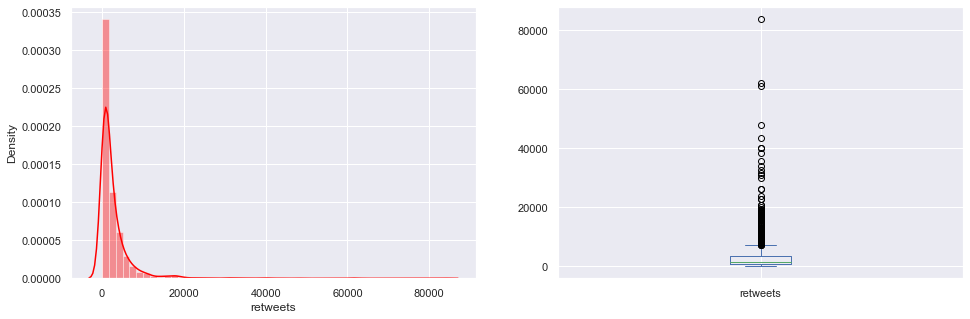

In [85]:
plt.figure(1)
plt.subplot(121)
sns.distplot(archive_clean['retweets'], color = 'red')


plt.subplot(122)
archive_clean['retweets'].plot.box(figsize=(16,5))

plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


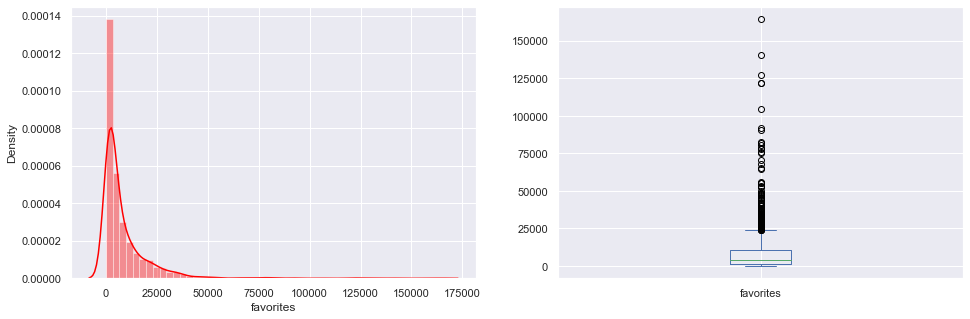

In [86]:
plt.figure(1)
plt.subplot(121)
sns.distplot(archive_clean['favorites'], color = 'red')


plt.subplot(122)
archive_clean['favorites'].plot.box(figsize=(16,5))

plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


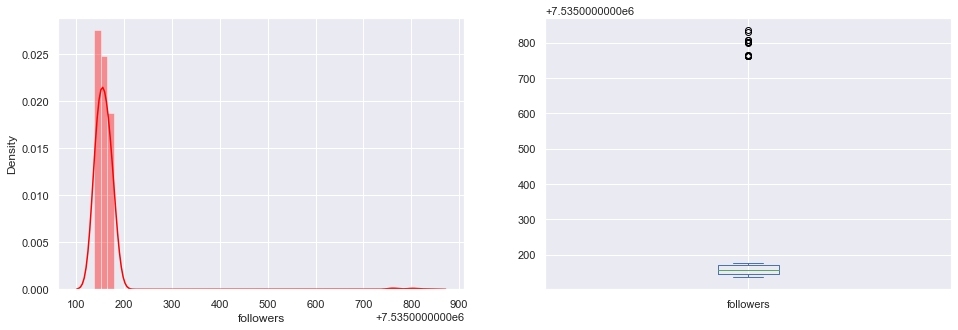

In [87]:
plt.figure(1)
plt.subplot(121)
sns.distplot(archive_clean['followers'], color = 'red')


plt.subplot(122)
archive_clean['followers'].plot.box(figsize=(16,5))

plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


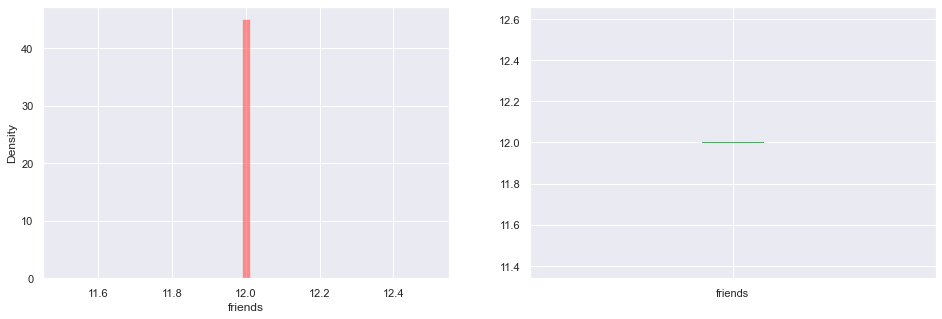

In [88]:
plt.figure(1)
plt.subplot(121)
sns.distplot(archive_clean['friends'], color = 'red')


plt.subplot(122)
archive_clean['friends'].plot.box(figsize=(16,5))

plt.show()

* Let us do a log transformation for retweets, favorites and followers only, so that we can normalize the data

In [89]:
# Just capping the values to 1 for whichever values <=0
archive_clean['favorites_mod'] = archive_clean.favorites[archive_clean.favorites <= 0] = 1
archive_clean['retweets_mod'] = archive_clean.retweets[archive_clean.retweets <= 0] = 1

/var/folders/pv/8_dxs8_115x9cdc0fvjjwv_r0000gn/T/ipykernel_22024/1918404780.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_clean['favorites_mod'] = archive_clean.favorites[archive_clean.favorites <= 0] = 1
/var/folders/pv/8_dxs8_115x9cdc0fvjjwv_r0000gn/T/ipykernel_22024/1918404780.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_clean['retweets_mod'] = archive_clean.retweets[archive_clean.retweets <= 0] = 1


In [90]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'retweets', 'favorites', 'followers', 'friends', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'dog_stage', 'favorites_mod', 'retweets_mod'],
      dtype='object')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Text(0.5, 0, 'Favorites - Count')

<Figure size 432x288 with 0 Axes>

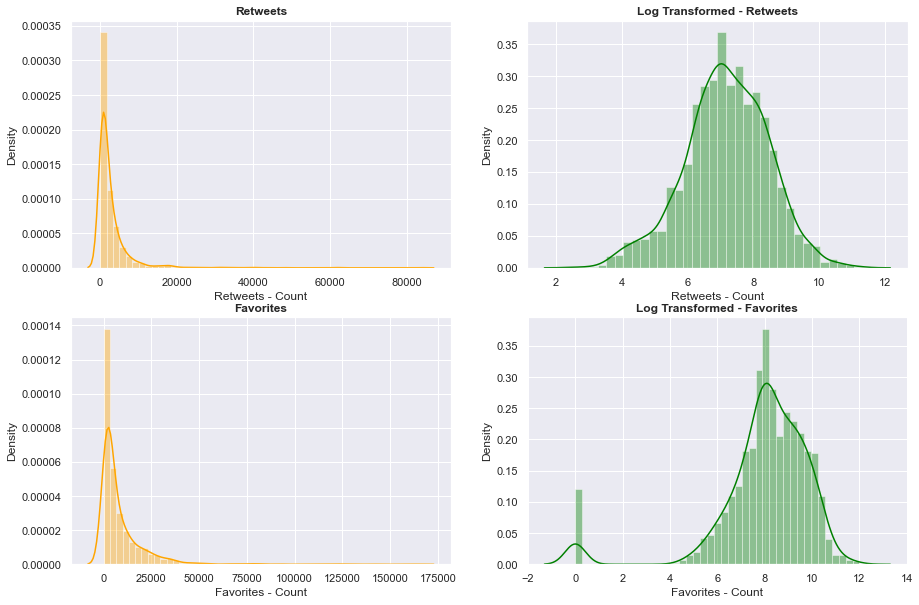

In [91]:
plt.figure(1)
plt.figure(figsize = (15,10))
plt.subplot(221)
sns.distplot(archive_clean.retweets, color = 'orange')
plt.title('Retweets', fontweight="bold", fontsize = 12.0)
plt.xlabel('Retweets - Count', fontsize=12)

plt.subplot(222)
sns.distplot(archive_clean.retweets.apply(np.log), color = 'green')
plt.title('Log Transformed - Retweets', fontweight="bold", fontsize = 12.0)
plt.xlabel('Retweets - Count', fontsize=12)
                                                                    

plt.subplot(223)
sns.distplot(archive_clean.favorites, color = 'orange')
plt.title('Favorites', fontweight="bold", fontsize = 12.0)
plt.xlabel('Favorites - Count', fontsize=12)

plt.subplot(224)
sns.distplot(archive_clean.favorites.apply(np.log), color = 'green')
plt.title('Log Transformed - Favorites', fontweight="bold", fontsize = 12.0)
plt.xlabel('Favorites - Count', fontsize=12)


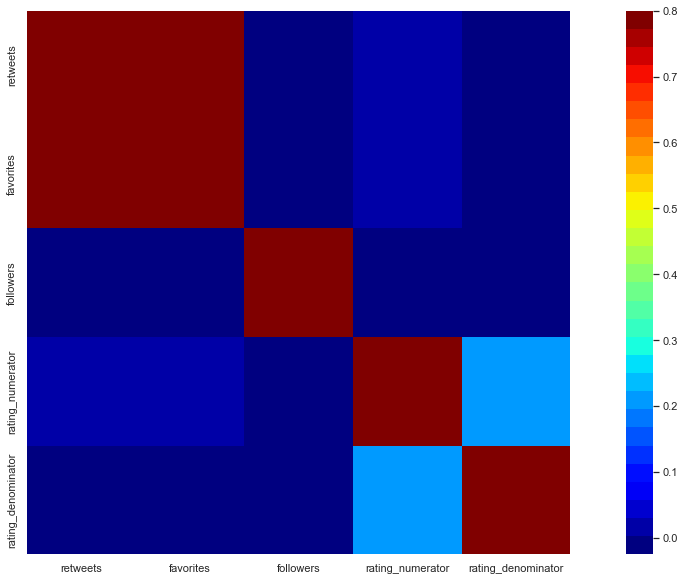

In [92]:
# Correlation between numerical variables
num_cols_data = (archive_clean[['retweets','favorites', 'followers', 'rating_numerator', 'rating_denominator' ]])
matrix = num_cols_data.corr()
f, ax = plt.subplots(figsize=(20, 10))
cm1 = cm.get_cmap('jet', 30)
sns.heatmap(matrix, vmax=.8, square=True, cmap=cm1);

* It seems like Retweets and Favorites are highly correlated.This shows that people who have retweeted have also done with favorites tag. Hence both the distributions shows similar behaviour

To confirm the above behavior, let us do a scatter plot between Retweet and Favorites

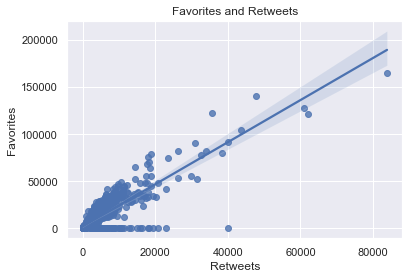

In [93]:
graph = sns.regplot(x=archive_clean.retweets, y=archive_clean.favorites)
plt.title("Favorites and Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites')
# sns.plt.show()
fig = graph.get_figure()
fig.savefig('scatterplot.png')

Yes both the Retweets and Favorites go in sync together

Text(0, 0.5, 'Count %')

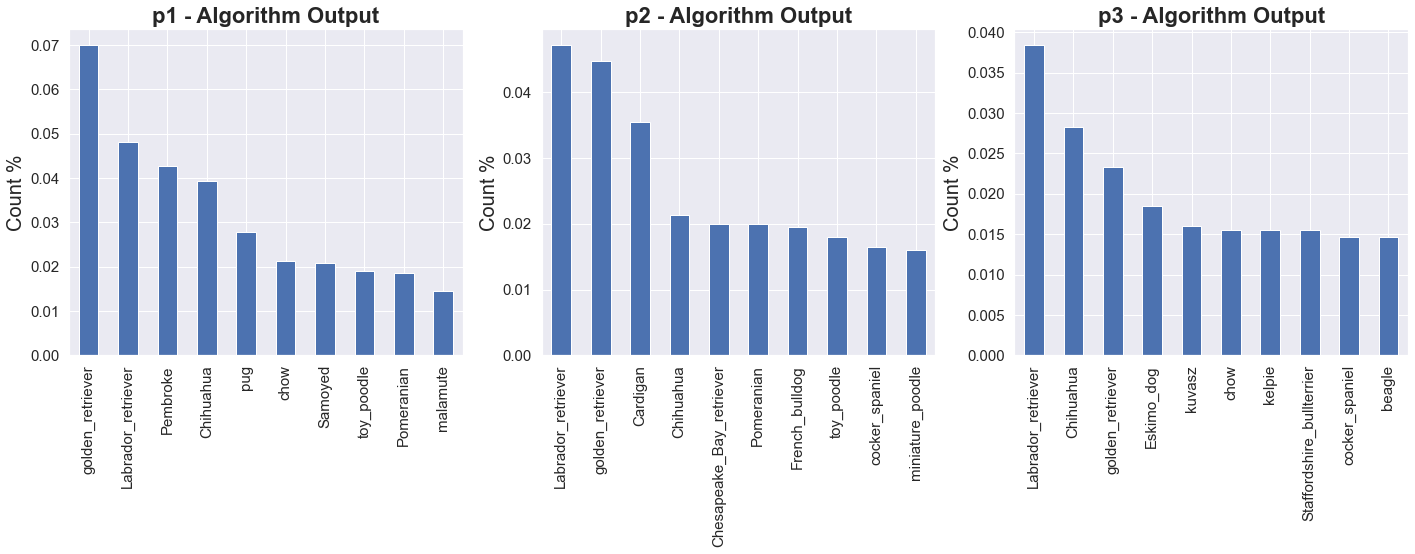

In [94]:
plt.figure(1)
plt.subplot(131)

archive_clean['p1'].value_counts(normalize=True).head(10).plot.bar(figsize=(24,6), fontsize = 15.0)
plt.title('p1 - Algorithm Output', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)

plt.subplot(132)
archive_clean['p2'].value_counts(normalize=True).head(10).plot.bar(figsize=(24,6), fontsize = 15.0)
plt.title('p2 - Algorithm Output', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)

plt.subplot(133)
archive_clean['p3'].value_counts(normalize=True).head(10).plot.bar(figsize=(24,6), fontsize = 15.0)
plt.title('p3 - Algorithm Output', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)



* Majority of the predictions by 3 algorithms is done for golden_retriever, Labrador_retriever and Chihuahua dogs

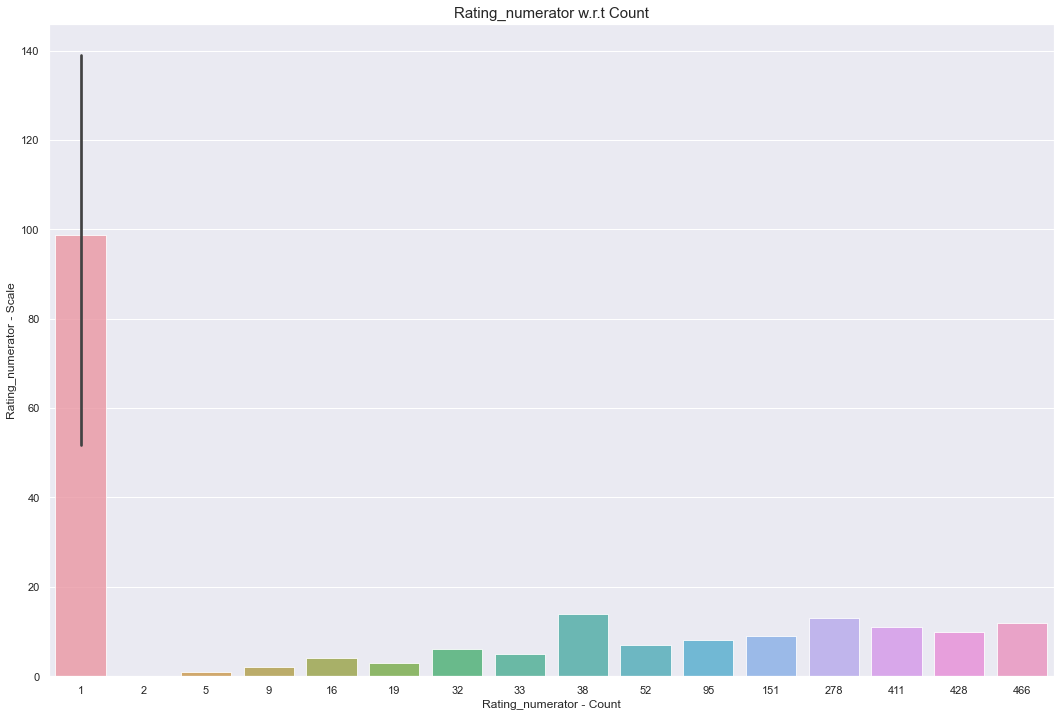

In [95]:
# Top rating_numerator values based on the count
cnt_srs = archive_clean['rating_numerator'].value_counts().head(20)
plt.figure(figsize=(18,12))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Rating_numerator - Count', fontsize=12)
plt.ylabel('Rating_numerator - Scale', fontsize=12)
plt.title("Rating_numerator w.r.t Count", fontsize=15)
plt.show()

* Rating numerator have majority of the ratings around 10

In [96]:
archive_clean[archive_clean['rating_denominator'] < 10].shape

(2, 30)

In [97]:
archive_clean[archive_clean['rating_denominator'] > 10].shape

(16, 30)

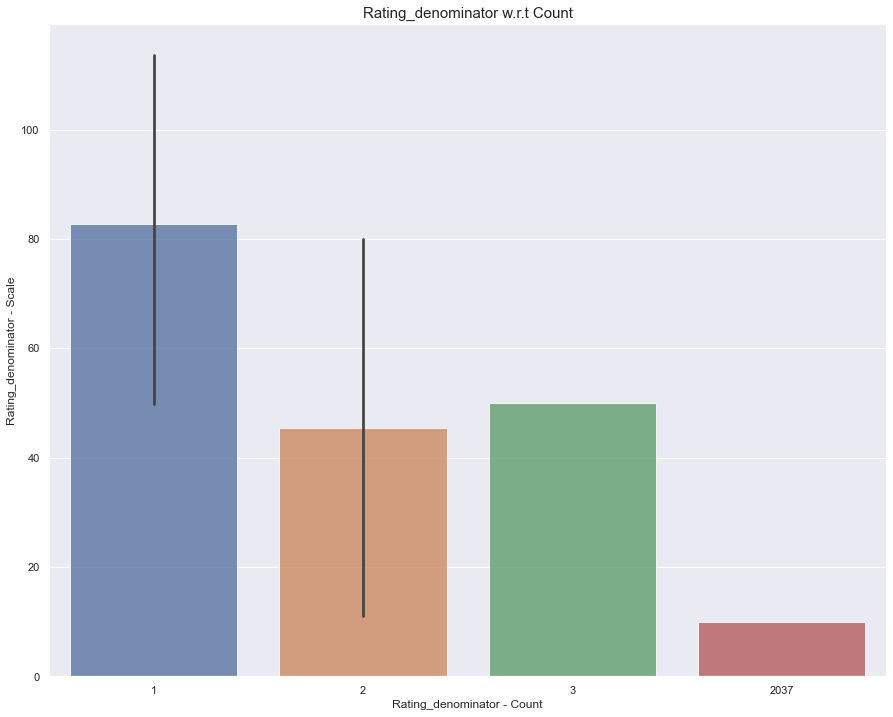

In [98]:
# Top rating_denominator values based on the count
cnt_srs = archive_clean['rating_denominator'].value_counts().head(30)
plt.figure(figsize=(15,12))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Rating_denominator - Count', fontsize=12)
plt.ylabel('Rating_denominator - Scale', fontsize=12)
plt.title("Rating_denominator w.r.t Count", fontsize=15)
plt.show()

* Normally there must be rating denominator with only 10, but sometimes users with exaggeration (may be) rated with < 10 and > 10.
* So overall we have 16 records with the above scenario and all other tweets are rated on 10

* 2037 tweets have 10 rating

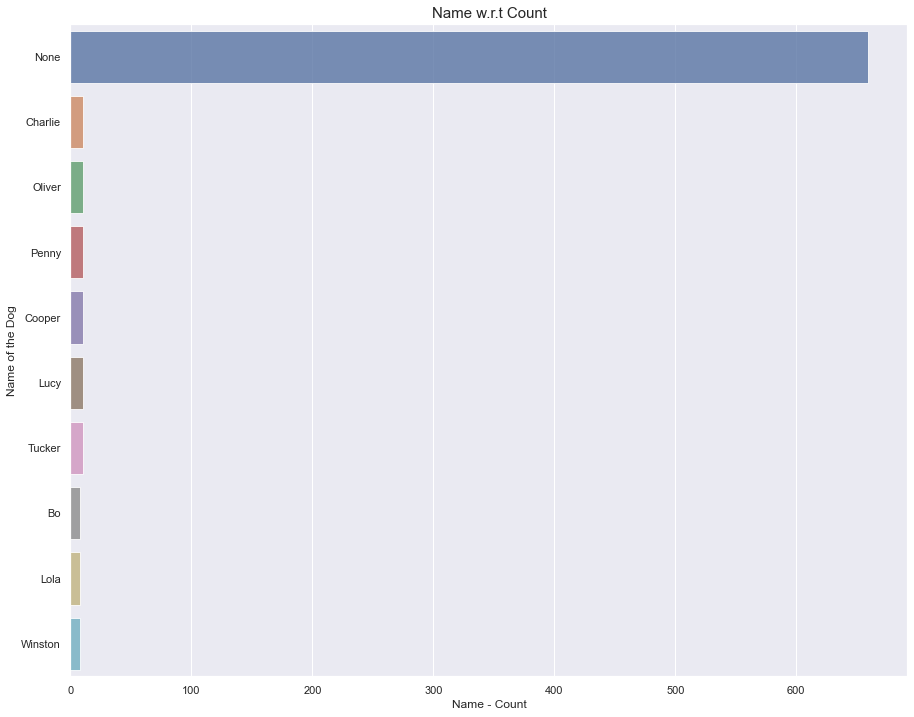

In [99]:
# Top dog name values based on the count
cnt_srs = archive_clean['name'].value_counts().head(10)
plt.figure(figsize=(15,12))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Name - Count', fontsize=12)
plt.ylabel('Name of the Dog', fontsize=12)
plt.title("Name w.r.t Count", fontsize=15)
plt.show()

* Majority of the Dog names are "None"

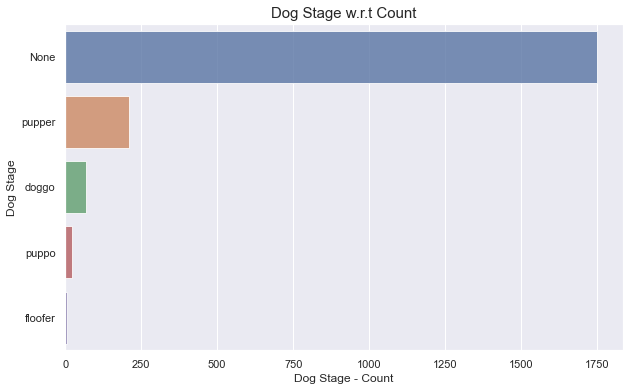

In [100]:
# Top Dog_stage values based on the count
cnt_srs = archive_clean['dog_stage'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Dog Stage - Count', fontsize=12)
plt.ylabel('Dog Stage', fontsize=12)
plt.title("Dog Stage w.r.t Count", fontsize=15)
plt.show()

* Majority of the tweets did not categorize the Dog stages but after this the dogs are having higher count with pupper